In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from openpyxl import Workbook
# # 创建无向图
G = nx.Graph()
# 读取文本文件
with open('email-Eu-core.txt') as f:
    email_list = [tuple(map(int, line.strip().split())) for line in f]
G.add_edges_from(email_list)


排名前10的节点的度为 [173, 177, 180, 185, 216, 218, 221, 233, 234, 347]


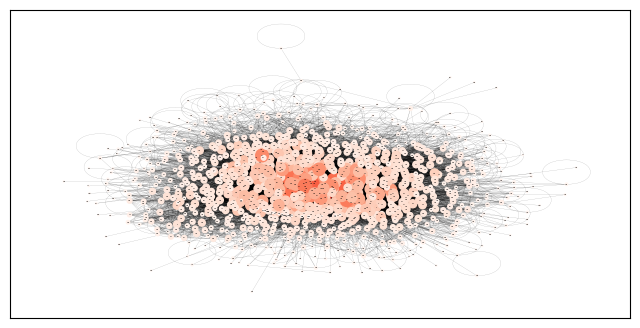

In [20]:
# 画图
# 计算节点的度
degree_dict = dict(G.degree())
keys = degree_dict.keys()
values = sorted([degree_dict.get(i) for i in keys])
print("排名前10的节点的度为",[i for i in values[-10:]])
# 为节点设置颜色和大小
node_color = [degree_dict[n] * 6 for n in G.nodes()]
node_size = [degree_dict[n] * 0.6 for n in G.nodes()]
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(8, 4))
nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=node_size, cmap=plt.cm.Reds)
nx.draw_networkx_edges(G, pos, alpha=0.5,width=0.1)
nx.draw_networkx_labels(G, pos, font_size=1)
# mpl.rcParams['savefig.dpi'] = 600
plt.savefig('network.png', dpi=600)
plt.show()

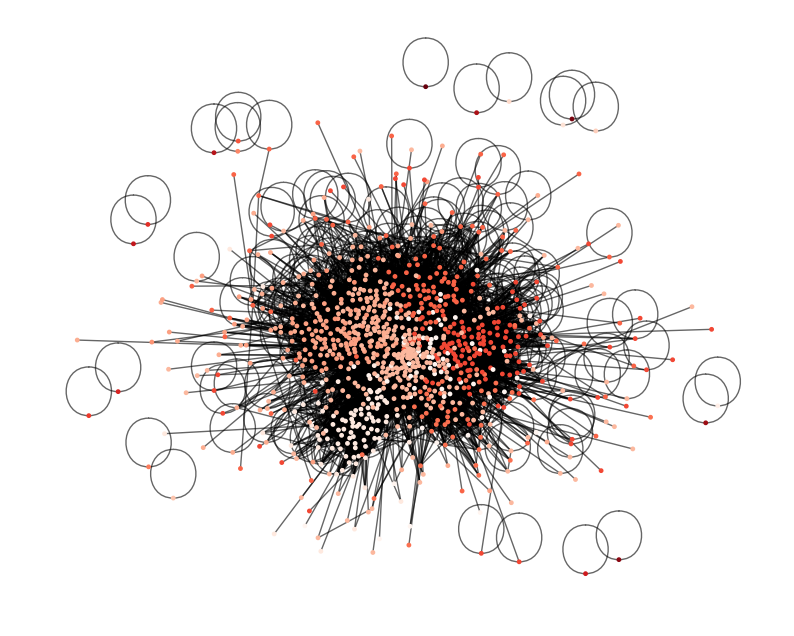

In [44]:
import community.community_louvain as louvain
import matplotlib.pyplot as plt

# 利用模块度最大化算法获取图中的社区
partition = louvain.best_partition(G)

# 绘制社区图
pos = nx.spring_layout(G, k=0.2)
plt.figure(figsize=(10, 8))
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=6, cmap=plt.cm.Reds, node_color=[i * 6 for i in  partition.values()])
nx.draw_networkx_edges(G, pos, alpha=0.6)
plt.show()